<a href="https://colab.research.google.com/github/Taeichang/DataAnalysis/blob/main/%EC%98%A4%ED%94%88%EC%86%8C%EC%8A%A4_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D_7%EA%B0%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오픈소스 기반 데이터 분석 7강 - 데이터 전처리 2

## 4.3 Pandas를 이용한 데이터 정제

### 4.3.1 결측치 찾기

* 결측치는 데이터에 값이 존재하지 않을 경우를 의미
* Pandas에서는 주로 NaN(Not a Number)로 표현

#### insull()과 insa() 메서드를 사용한 결측치 확인

> isnull() - 각 요소가 결측치인지 여부를 나타내는 불리언 DataFrame 반환

> isna() - isnull()과 동일한 기능 수행

> sum() - 각 열의 결측치 개수 계산, 어떤 열에 집중되어 있는지 빠르게 확인

> sum(axis=1) 매개변수 - 행별 결측치 개수

> any() - isnull() 메서드와 함께 사용함, 데이터셋 결측치 존재 여부를 불리언 값으로 확인, 하라나도 존재 시 True, 모두 채워져 있을 경우 False

> df[df.isnull().any(axis=1) - 하나 이상의 결측지를 포함한 행만 쉽게 추출

> notnull() - insull() 반대의 결과, 값이 존재하는 항목 확인

> DataFrame의 shape 속성을 사용하여 전체 데이터 요소의 수 계산, 결측치 차지 비율 백분율로 표시

In [3]:
import pandas as pd
import numpy as np

data = {'이름': ['김철수', '이영희', '박민수', '최지훈', '정소희'],
        '나이': [25, 30, np.nan, 22, 35],
        '도시': ['서울', None, '인천', '서울', '대전'],
        '점수': [90, 85, np.nan, 80, 92]}

df = pd.DataFrame(data)

# 결측치 여부 확인
print('\n1. 결측치 여부 확인 (isnull):\n', df.isnull())
print('\n2. 결측치 여부 확인 (isna):\n', df.isna())

# 열별, 행별 결측치 개수 확인
print('\n3. 열별 결측치 개수:\n', df.isnull().sum())
print('\n4. 행별 결측치 개수:\n', df.isnull().sum(axis = 1))

# 특정 열, 행 결측치 확인
print('\n5. 결측치가 있는 행:\n', df[df.isnull().sum(axis = 1)])
print('\n6. '나이'에 결측치가 있는 행:\n', df[df['나이'].isnull()])

# 결측치가 아닌 항목 확인
print('\n7. 결측치가 아닌 항목 확인 (notnull):\n', df.notnull())

# 결측치 비율
missing_percentage = df.isnull().sum().sum() / (df.shape[0] * df.shape[1]) * 100
print(f'\n8. 전체 데이터 중 결측치 비율: {missing_percentage:.2f}%')


1. 결측치 여부 확인 (isnull):
       이름     나이     도시     점수
0  False  False  False  False
1  False  False   True  False
2  False   True  False   True
3  False  False  False  False
4  False  False  False  False

2. 결측치 여부 확인 (isna):
       이름     나이     도시     점수
0  False  False  False  False
1  False  False   True  False
2  False   True  False   True
3  False  False  False  False
4  False  False  False  False

3. 열별 결측치 개수:
 이름    0
나이    1
도시    1
점수    1
dtype: int64

4. 행별 결측치 개수:
 0    0
1    1
2    2
3    0
4    0
dtype: int64


KeyError: "None of [Index([0, 1, 2, 0, 0], dtype='int64')] are in the [columns]"

#### 시각화 도구를 활용한 결측치 패턴 파악  

> Seaborn의 heatmap() - 결측치의 분포를 직관적으로 표현, 어떤 패턴으로 발생하는지 파악


> missingno의 matrix() - 결측치 패턴을 시각화, 데이터 누락 여부를 행렬로 표현


* sns.heatmap(df.isnull()) 통해 df의 결측치 여부를 색상으로 표현

In [9]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache –fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.


In [7]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 47492 (\N{HANGUL SYLLABLE REUM}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 45208 (\N{HANGUL SYLLABLE NA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 51216 (\N{HANGUL SYLLABLE JEOM}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/lo

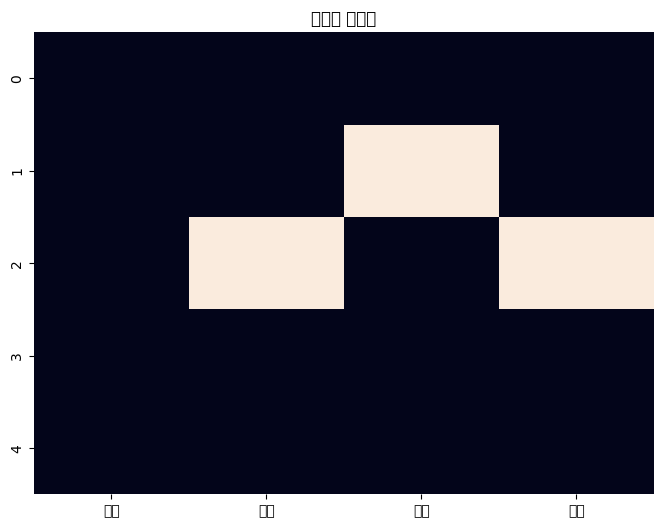

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47492 (\N{HANGUL SYLLABLE REUM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45208 (\N{HANGUL SYLLABLE NA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/loca

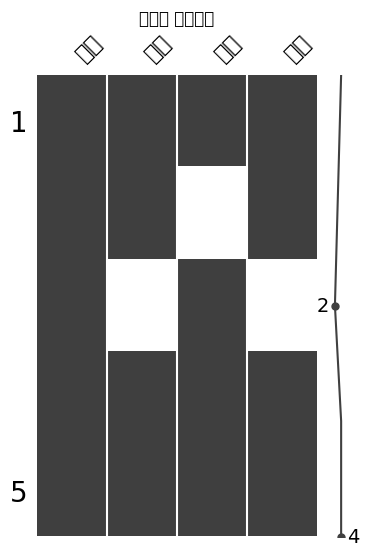

In [8]:
import numpy as np
import pandas as pd

# 시각화 라이브러리 임포트
import seaborn as sns
import missingno as msno

data = {'이름': ['김철수', '이영희', '박민수', '최지훈', '정소희'],
        '나이': [25, 30, np.nan, 22, 35],
        '도시': ['서울', None, '인천', '서울', '대전'],
        '점수': [90, 85, np.nan, 80, 92]}
df = pd.DataFrame(data)

# 결측치 히트맵
plt.figure(figsize = (8, 6))
sns.heatmap(df.isnull(), cbar=False)
plt.title("결측치 히트맵")
plt.show()

# 결측치 매트릭스
msno.matrix(df, figsize = (4, 6))
plt.title("결측치 매트릭스")
plt.show()

### 4.3.2 이상치 찾기

#### 사분위 범위를 통한 이상치 찾기

In [ ]:
import pandas as pd
import numpy as np

점수_데이터 = [72, 68, 75, 282, 64, 31, 78, 69, 88, 92, 22, 84, 61, -90, 130, 66]
학번_데이터 = list(range(1001, 1001 + len(점수_데이터)))

df = pd.DataFrame({
    '학번': 학번_데이터,
    '점수': 점수_데이터
})

### 사분위 범위 경계값 계산


### IQR 통계량 출력



#### Z-score를 활용한 이상치 탐지

In [ ]:
import pandas as pd
import numpy as np

점수_데이터 = [72, 68, 75, 282, 64, 31, 78, 69, 88, 92, 22, 84, 61, -90, 130, 66]
학번_데이터 = list(range(1001, 1001 + len(점수_데이터)))

df = pd.DataFrame({
    '학번': 학번_데이터,
    '점수': 점수_데이터
})

### Z-점수 계산

### 임계값 설정 및 이상치 여부 판단

### 이상치 데이터 출력

### 이상치 비율 출력


## 4.4 Pandas를 이용한 데이터 문제 해결

### 4.4.1 데이터 문제 해결

#### 평균값 및 선형보간법을 통한 결측치 처리

In [ ]:
import pandas as pd
import numpy as np

file_path = "raw_large_shopping_customer.csv"
df = pd.read_csv(file_path)
print(df.isnull().sum())

df_cleaned = df.dropna(thresh=df.shape[1] - 1)

### 나이, 소득 평균값 대치 및 결과 출력


### 지출, 평균구매횟수 선형보간법 적용


df_cleaned.to_csv("cleaned_large_shopping_customer.csv", index=False, encoding="utf-8-sig")

### 4.4.2 Pandas 데이터 값 변경

#### replace() 메서드 데이터 값 변경

In [ ]:
import pandas as pd

data = {'age': [25, 30, None, 22, 35],
        'city': ['Seoul', None, 'Incheon', 'Seoul', 'Daejeon'],
        'score': [90, 85, None, 80, 92]}
df = pd.DataFrame(data)

### replace를 이용한 Seoul -> 서울

### replace를 이용한 None -> 미정, Incheon -> 인천

### map을 이용한 값 변경
city_map = {'Seoul': '서울특별시', None: '미정', 'Incheon':'인천광역시', 'Daejeon':'대전광역시'}

### apply 함수를 이용한 값 변경

### apply 함수를 이용한 행단위 값 변경

### loc 인덱스를 이용한 값 변경

### where 함수를 이용한 값 변경



### 4.4.3 날짜 데이터 다루기

#### datetime 데이터 타입 변환, dt 접근자를 통한 날짜 정보 추출, 날짜 데이터 변경하는 예


In [ ]:
date_str = ['2025-07-01', '2025-08-01', '2025-09-01']
df_date = pd.DataFrame({'date_str':date_str})

### datetime 타입 변환

### 날짜 데이터 분리

### 날짜 데이터 포멧 변경


## 4.5 개념정리 실습 (6강 마지막 부분부터)

### Kaggle을 활용한 데이터 수집 및 측정

#### Kaggle API 키 업로드

- Kaggle([https://www.kaggle.com](https://www.kaggle.com)) 회원 가입
- Kaggle 접근 토큰 생성(API 키)


In [ ]:
from google.colab import files
files.upload()

#### Kaggle API 키 사용을 위한 Colab 환경 설정

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

#### Kaggle 데이터셋 다운로드

In [ ]:
!kaggle competitions download –c store-sales-time-series-forecasting

!unzip store-sales-time-series-forecasting.zip

#### Kaggle 데이터셋 DataFrame 로드 및 살펴보기

In [ ]:
import pandas as pd

# Grocery Sales 데이터 DataFrame 로드
train =  pd.read_csv('train.csv')
stores =  pd.read_csv('stores.csv')
transactions =  pd.read_csv('transactions.csv')
oil =  pd.read_csv('oil.csv')
holidays_events =  pd.read_csv('holidays_events.csv')

# 판매 데이터 살펴보기
train.info()

#### Kaggle 데이터셋 측정

In [ ]:
# 판매 데이터 기본 통계량
train.describe()

# 매장 데이터 기본 정보
stores.head()

# 원유 가격 데이터 기본 정보
oil.head()

#### 데이터 분포 시각화

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(train['sales'], bins=50)
plt.title("판매량 분포")
plt.xlabel("판매량")
plt.ylabel("빈도")
plt.xlim(0, 5000)
plt.show()

store_sales = train.groupby('store_nbr')['sales'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='store_nbr', y='sales', data=store_sales)
plt.title("매장별 평균 판매량")
plt.xlabel("매장 번호")
plt.ylabel("평균 판매량")
plt.xticks(rotation=90)
plt.show()

#### 결측치 처리

In [ ]:
## 판매, 매장, 거래, 원유, 휴일이벤트 데이터 결측치



In [ ]:
import missingno as msno

msno.matrix(oil)
plt.title("원유 가격 데이터 결측치 분포")
plt.show()

oil['date'] = pd.to_datetime(oil['date'])
plt.figure(figsize=(12, 6))
plt.plot(oil['date'], oil['dcoilwtico'])
plt.title("시간에 따른 원유 가격 변화")
plt.xlabel("날짜")
plt.ylabel("원유 가격")
plt.grid(True)
plt.show()

In [ ]:
oil_cleaned = oil.copy()

### 선형 보간법 적용한 원유 가격 데이터


plt.figure(figsize=(12, 6))
plt.plot(oil_cleaned['date'], oil_cleaned['dcoilwtico'], 'b-')
plt.title("원유 가격 보간 후 데이터")
plt.xlabel("날짜")
plt.ylabel("원유 가격")
plt.grid(True)
plt.show()

#### 이상치 처리

In [ ]:
### 제품 계열별 판매 데이터 IQR 계산


### 상한값 초과 판매량 이상치 분류


print(f"이상치 개수: {total_outliers:,}건")
print(f"전체 대비 비율: {total_ratio:.2%}")

plt.figure(figsize=(15,6))
sns.stripplot(x='family', y='sales', hue=train_enhanced['is_outlier'],
              data=train_enhanced, palette={False:'blue', True:'red'})
plt.xticks(rotation=90)
plt.yscale('log')
plt.title('계열별 판매량 분포 (파랑: 정상, 빨강: 이상)')
plt.show()

In [ ]:
upper_bounds = family_bounds['upper_bound']

### 판매량이 상한값 초과 시, 판매량으로 상한값으로 대체
train_cleaned  = train.copy()


changed_count = (train['sales'] != train_cleaned ['sales']).sum()
print(f"대체된 데이터 수: {changed_count}건")

#### 날짜 데이터 처리

In [ ]:
### 판매, 거래, 휴일 이벤트, 원율 데이터 내 date 컬럼 데이터 datetime 데이터 타입으로 변경



train_cleaned['year'] = train_cleaned['date'].dt.year
train_cleaned['month'] = train_cleaned['date'].dt.month
train_cleaned['day'] = train_cleaned['date'].dt.day
train_cleaned['dayofweek'] = train_cleaned['date'].dt.dayofweek
### 주말, 월초, 월말 여부 추철


print("날짜 특성 추출 결과:")
print(train_cleaned[['date', 'year', 'month', 'day', 'dayofweek', 'weekend', 'is_month_start', 'is_month_end']].head())

In [ ]:
## 요일별 평균 판매량을 계산

## 요일 출력값 변경

plt.figure(figsize=(10, 6))
sns.barplot(x='day_name', y='sales', data=day_sales)
plt.title("요일별 평균 판매량")
plt.xlabel("요일")
plt.ylabel("평균 판매량")
plt.show()

#### 데이터 통합

In [ ]:
## 판매, 거래 데이터 통합


## 매장 데이터 통합


## 원유 데이터 통합


print("최종 데이터셋 정보:")
print(f"행 개수: {train_final.shape[0]}, 열 개수: {train_final.shape[1]}")
print(train_final.columns.tolist())
print(train_final.head())